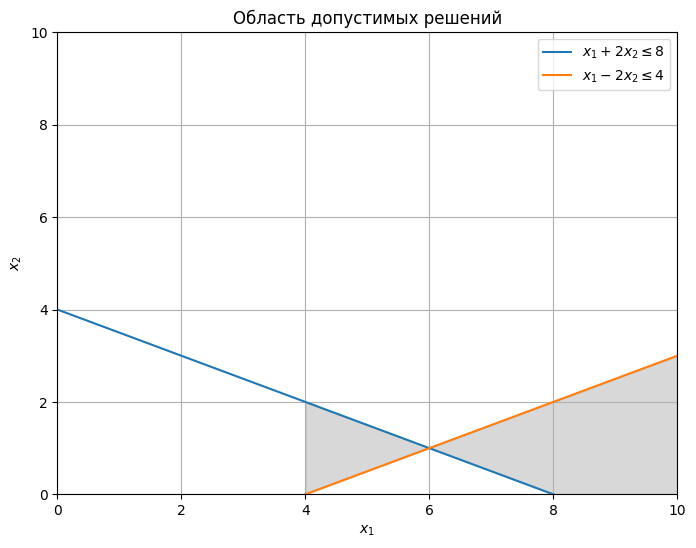

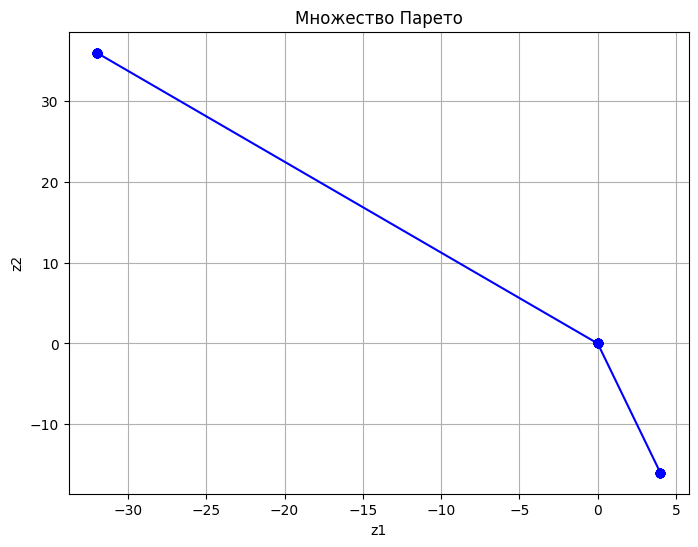

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Ограничения
x1 = np.linspace(0, 10, 400)
x2_1 = (8 - x1) / 2  # Ограничение x1 + 2x2 <= 8
x2_2 = (x1 - 4) / 2  # Ограничение x1 - 2x2 <= 4

# График области допустимых решений
plt.figure(figsize=(8, 6))
plt.plot(x1, x2_1, label=r'$x_1 + 2x_2 \leq 8$')
plt.plot(x1, x2_2, label=r'$x_1 - 2x_2 \leq 4$')

# Закраска области допустимых решений
plt.fill_between(x1, np.maximum(0, x2_1), np.minimum(10, x2_2), where=(x2_2 >= 0), color='gray', alpha=0.3)

# Настройки графика
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.title('Область допустимых решений')
plt.grid(True)

# Показать график области допустимых решений
plt.show()

# Теперь добавляем точки Парето
A_ub = [[1, 2], [1, -2]]
b_ub = [8, 4]
x_bounds = (0, None)
x2_bounds = (0, None)

lambdas = np.linspace(0, 1, 50)
pareto_solutions = []

# Определение коэффициентов для целевых функций
c1 = [-1, 8]  # для z1
c2 = [4, -9]  # для z2

for lam in lambdas:
    combined_c = [-(1 - lam) * 1 + lam * 4, (1 - lam) * 8 + lam * -9]
    res = linprog(combined_c, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, x2_bounds], method='highs')
    
    if res.success:
        z1_value = res.x[0] - 8 * res.x[1]  # z1 = x1 - 8x2
        z2_value = -4 * res.x[0] + 9 * res.x[1]  # z2 = -4x1 + 9x2
        pareto_solutions.append((z1_value, z2_value))

# Преобразуем список решений в массив
pareto_solutions = np.array(pareto_solutions)

# Построение множества Парето
plt.figure(figsize=(8, 6))
plt.plot(pareto_solutions[:, 0], pareto_solutions[:, 1], marker='o', color='b')
plt.title('Множество Парето')
plt.xlabel('z1')
plt.ylabel('z2')
plt.grid(True)

# Показать график множества Парето
plt.show()